<a href="https://colab.research.google.com/github/vineet-codes/defi-exploration/blob/main/yop_user_incentive_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import matplotlib.pyplot as plt

In [91]:
YOP_staked = 10_000
staking_duration = 5
vault_deposit_value = 30_000
total_YOP_staked_depositors = 250_000
avg_duration_locked = 1
TVL_vaults = 200_000

In [92]:
def boosting_multiplier(YOP_staked, staking_duration, vault_deposit_value, total_YOP_staked_depositors, avg_duration_locked, TVL_vaults):
  r = ((YOP_staked * staking_duration)/(total_YOP_staked_depositors * avg_duration_locked)) / (vault_deposit_value / TVL_vaults)

  f = min(1 + r, 3)  # emmision_rate * user_val
  return f

In [93]:
boosting_multiplier(YOP_staked, staking_duration, vault_deposit_value, total_YOP_staked_depositors, avg_duration_locked, TVL_vaults)

2.3333333333333335

In [94]:
# what happens if TVL increases but the staking pool reamins the same

In [95]:
def generate_tvl_increase_data():
  data = [(YOP_staked, staking_duration, vault_deposit_value, total_YOP_staked_depositors, avg_duration_locked, TVL_vaults+ i*1000 ) for i in range(1000)]
  return data

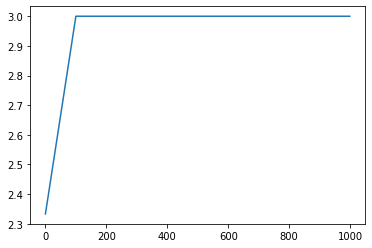

In [96]:
d = generate_tvl_increase_data()
plt.plot([boosting_multiplier(*x) for x in d])

In [97]:
# what if its the same user that is increasing his deposits in vaults

In [98]:
def generate_tvl_increase_by_same_user_data():
  data = [(YOP_staked, staking_duration, vault_deposit_value+ i*1000, total_YOP_staked_depositors, avg_duration_locked, TVL_vaults+ i*1000 ) for i in range(1000)]
  return data

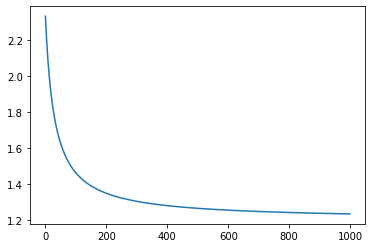

In [99]:
d = generate_tvl_increase_by_same_user_data()
plt.plot([boosting_multiplier(*x) for x in d])

What happens if user starts gaining more staking pool share 

In [100]:
def user_stake_pool_share_increases_data():
  data = [(YOP_staked + i*10, staking_duration, vault_deposit_value, total_YOP_staked_depositors, avg_duration_locked, TVL_vaults ) for i in range(1000)]
  return data

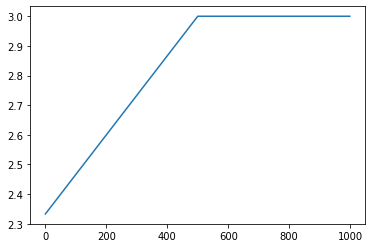

In [101]:
d = user_stake_pool_share_increases_data()
plt.plot([boosting_multiplier(*x) for x in d])

How much user needs to stake for depositing additional X$ in vaults such that his boost percentage remains same ? 

For simplicity, lets assume he gains pool share

In [74]:
def foo(x, y):
  """
  x: vault deposit pool share
  y: stake pool share
  """
  data = [(YOP_staked + i*y, staking_duration, vault_deposit_value + i*x, total_YOP_staked_depositors+i*y, avg_duration_locked, TVL_vaults+ i*x ) for i in range(2000)]
  return data

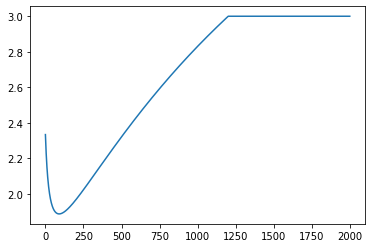

In [114]:
d = foo(1000,100)
plt.plot([boosting_multiplier(*x) for x in d])

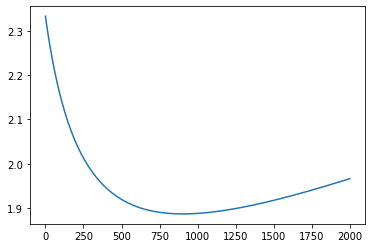

In [85]:
d = foo(100,10)
plt.plot([boosting_multiplier(*x) for x in d])

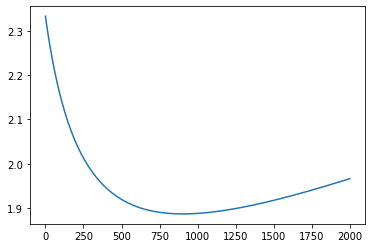

In [112]:
d = foo(100,10)
plt.plot([boosting_multiplier(*x) for x in d])